In [391]:
import random
import math
import statistics
import matplotlib.pyplot as plt


In [268]:
%matplotlib inline

In [295]:
def heads_or_tails(x=2**16):
    empty_list = []
    for result in range(x):
        result = random.randint(0,1)
        empty_list.append(result)
        if len(empty_list) == 2**0:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**1:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**2:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**4:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**8:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**16:
            yield empty_list.count(1), empty_list.count(0)
    
data_table = list(heads_or_tails())
data_table 

[(1, 0), (2, 0), (4, 0), (9, 7), (129, 127), (32733, 32803)]

Tuples shwoing heads vs. tails results in different sized trials

In [296]:
def heads_tails_diff(data):
    alist = []
    for result in data:
        result = list(result)
        print(result)
        for x in result:
            difference = result[1] - result[0]
            alist.append(difference)
            break
    return alist

end_results = heads_tails_diff(data_table)

[1, 0]
[2, 0]
[4, 0]
[9, 7]
[129, 127]
[32733, 32803]


Putting these results into lists (first value = heads)

In [297]:
def heads_or_tails(x=16):
    empty_list = []
    for result in range(2**x):
        result = random.randint(0,1)
        empty_list.append(result)
        if len(empty_list) == 2**0:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**1:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**2:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**4:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**8:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**16:
            yield empty_list.count(1), empty_list.count(0)
    
dataset = list(heads_or_tails())

def heads_tails_diff(data):
    differences_list = []
    for result in data:
        result = list(result)
        for x in result:
            difference = result[1] - result[0]
            differences_list.append(difference)
            break
    return differences_list

def heads_tails_ratio(data):
    ratio_list = []
    for result in data:
        result = list(result)
        for x in result:
            try:
                ratio = result[1] / result[0]
                ratio_list.append(ratio)
            except: 
                if result[0] == 0:
                    ratio = result[1]
                    ratio_list.append(ratio)
            break
    return ratio_list

def heads_tails_totals(data):
    heads_list = []
    tails_list = []
    for result in data:
        result = list(result)
        for x in result:
            heads_list.append(result[0])
            tails_list.append(result[1])
            break
    return heads_list, tails_list

differentials = heads_tails_diff(dataset)
ratios = heads_tails_ratio(dataset)
totals = heads_tails_totals(dataset)
total_heads = totals[0]
total_tails = totals[1]

print(differentials)
print(ratios)
print(total_heads)
print(total_tails)

[-1, -2, -4, -8, 24, 150]
[0.0, 0.0, 0.0, 0.3333333333333333, 1.206896551724138, 1.0045881381335453]
[1, 2, 4, 12, 116, 32693]
[0, 0, 0, 4, 140, 32843]


Showing:
1) Differential between heads and tails for 2^0, 2^1, 2^2, 2^4 ,2^8 , 2^16 trials
2) Heads to tails ratio
3) Total Heads
4) Total Tails

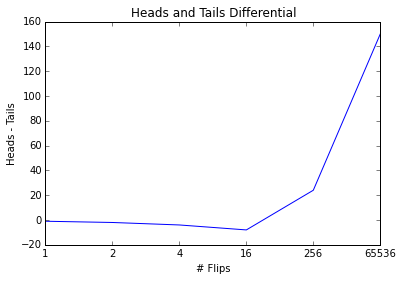

In [298]:
lengths = [2**0, 2**1, 2**2, 2**4, 2**8, 2**16]

y1 = differentials
x1 = [lengths[0],lengths[1],lengths[2],lengths[3],lengths[4],lengths[5]]
plt.xticks([0,1,2,3,4,5], x1)
plt.plot(y1)
plt.ylabel("Heads - Tails")
plt.title("Heads and Tails Differential")
plt.xlabel("# Flips")
plt.show()

It is very reasonalble that the difference between total heads and tails will increase when you increase the trial size exponentially to over 65,000 flips. However, the fact that it was only about a 160 flip difference in that many trials is incredibly telling, and that smallness of that difference is misrepresented in my mind inthis graph.

In [399]:
lengths = [2**0, 2**1, 2**2, 2**4, 2**8, 2**16]

y1 = differentials
plt.xscale('log')
#plt.xticks([1,2,3,4])
plt.scatter(range(6), y1)
plt.ylabel("Heads - Tails")
plt.title("Heads and Tails Differential")
plt.xlabel("# Flips")
plt.show()

TypeError: 'str' object is not callable

The data is more accurately depicted using a logarithmic scale for the x axis

[0.0, 0.0, 0.0, 0.3333333333333333, 1.206896551724138, 1.0045881381335453]


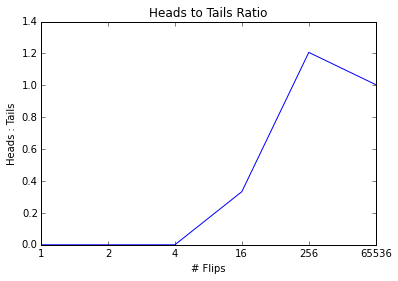

In [317]:
y1 = ratios
print(ratios)
x1 = [lengths[0],lengths[1],lengths[2],lengths[3],lengths[4],lengths[5]]
plt.xticks([0,1,2,3,4,5], x1)
plt.plot(y1)
plt.ylabel("Heads : Tails")
plt.title("Heads to Tails Ratio")
plt.xlabel("# Flips")
plt.show()

After the first trial of one flip, which can be thrown away, the ratio between heads and tails remains remarkably close to 1.0. This is a much better representation of what is going on than the differentials. 

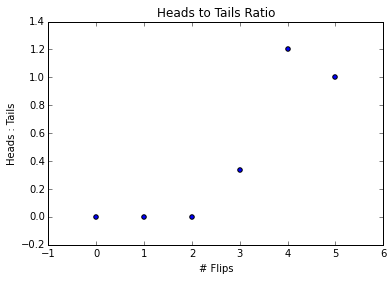

In [364]:
y1 = ratios
plt.xscale = "log"
#x1 = ["1", "2", "4", "16","256","65536"]
#plt.xticks([0,1,2,3,4,5], x1)
plt.scatter(range(6), y1)
plt.ylabel("Heads : Tails")
plt.title("Heads to Tails Ratio")
plt.xlabel("# Flips")
plt.show()

In [319]:
y1 = ratios
plt.xscale("symlog")
plt.xticks([0,1,2,3,4,5], ["2^0","2^1", "2^2", "2^4", "2^8", "2^16"])
plt.scatter(range(6), y1)
plt.ylabel("Heads - Tails")
plt.title("Heads and Tails Results")
plt.xlabel("# Flips")
plt.show()

TypeError: 'str' object is not callable

In [56]:
def heads_or_tails(x=16):
    empty_list = []
    results_list = []
    for result in range(2**x):
        result = random.randint(0,1)
        empty_list.append(result)
        if len(empty_list) == 2**0:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**1:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**2:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**4:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**8:
            yield empty_list.count(1), empty_list.count(0)
        if len(empty_list) == 2**16:
            yield empty_list.count(1), empty_list.count(0)
    
def multiple_trials(x=20):
    trial_list = []
    for trials in range(x):
        trial_list.append(list(heads_or_tails()))
    return trial_list

run_multiple_trials = multiple_trials()

run_multiple_trials

def ordered_ratios():
    empty_list = []
    empty_list2 = []
    for y in range(6):
        for x in range(20):
            turn = (run_multiple_trials[x][y]) 
            empty_list.append(turn)
    return empty_list


data_sixth_turn = ordered_ratios()[101:120]

def heads_tails_ratio1(data):
    for x in data_sixth_turn:
        ratio_list = []
        for result in data:
            result = list(result)
            for x in result:
                ratio = result[1] / result[0]
                ratio_list.append(ratio)
                break
        return ratio_list

list_of_twenty_trial_ratios = heads_tails_ratio1(data_sixth_turn)


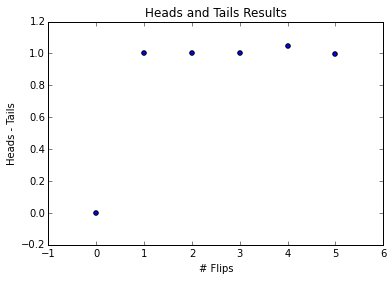

In [58]:

# plot points in scatter plot
# plot mean as a straight line
# plot standard deviation as two dotted lines
y1 = ratios
plt.xlim = (0, 2**16)
#plt.xscale("symlog")
#plt.xticks([0,1,2,3,4,5], x1)
plt.scatter(range(6), y1)
plt.ylabel("Heads - Tails")
plt.title("Heads and Tails Results")
plt.xlabel("# Flips")
plt.show()

In [107]:
twenty_trial_mean = statistics.mean(list_of_twenty_trial_ratios)
twenty_trial_stdev = statistics.stdev(list_of_twenty_trial_ratios)
print(list_of_twenty_trial_ratios)
print(twenty_trial_mean)


[0.9885908484039325, 1.0012214486380848, 0.995189819466009, 1.0019550342130987, 1.0045881381335453, 0.9956151035322777, 0.9951290793960058, 0.9930055043639571, 0.9988410040564858, 1.002322028719829, 0.9928842937509503, 1.0023832075529346, 1.0113556148912008, 1.0026891578046693, 0.9982315455681922, 1.002750359074657, 1.0051401297270837, 0.9989629403690712, 0.9942184219334814]
0.999214404189235


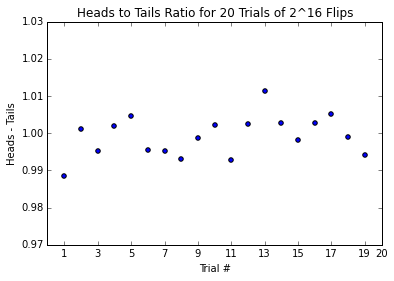

In [113]:
y1 = list_of_twenty_trial_ratios
x1 = ["1","3","5","7","9","11","13","15","17","19", "20"]
plt.xticks([0,2,4,6,8,10,12,14,16,18,19], x1)
plt.scatter(range(19), y1)
plt.ylabel("Heads - Tails")
plt.title("Heads to Tails Ratio for 20 Trials of 2^16 Flips")
plt.xlabel("Trial #")



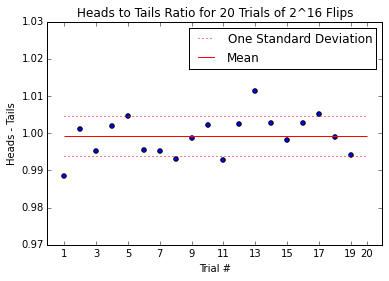

In [120]:
y1 = list_of_twenty_trial_ratios
x1 = ["1","3","5","7","9","11","13","15","17","19", "20"]
plt.xticks([0,2,4,6,8,10,12,14,16,18,19], x1)
plt.scatter(range(19), y1)
plt.ylabel("Heads - Tails")
plt.title("Heads to Tails Ratio for 20 Trials of 2^16 Flips")
plt.xlabel("Trial #")
mean_line = plt.hlines([twenty_trial_mean],0,19, 'red')
standard_dev_line = plt.hlines([twenty_trial_mean - twenty_trial_stdev],0,19, 'red', ":")
plt.hlines([twenty_trial_mean + twenty_trial_stdev],0,19, 'red', ":")
plt.legend([standard_dev_line, mean_line], ['One Standard Deviation', 'Mean'])

In [ ]:
#Lastly, run 100,000 trials of 100 coin flips each. 
#Plot a histogram of the ratio of heads to total flips for each 
#trial. Run 100,000 trials of 1,000 coin flips each and 
#plot that histogram as well. Lastly, plot a box plot of 
#your results from the 100 coin flip trials and your 
#results from the 1,000 coin flip trials.

In [199]:
#100,000 trials of 100 coin flips
#1's are heads
def heads_tails_trial(x=100):
    empty_list = []
    results_list = []
    for result in range(x):
        result = random.randint(0,1)
        empty_list.append(result)
    return empty_list
    
def multiple_trials(x=100000):
    trial_list = []
    for trials in range(x):
        trial_list.append(list(heads_or_tails()))
    return trial_list

def heads_tails_ratio2(data):
    for trial in multiple_trials:
        ratio_list = []
        for result in trial:
            result = list(result)
            for x in result:
                ratio = result[1] / result[0]
                ratio_list.append(ratio)
                break
        return ratio_list

def large_trial_ratios():
    trial_data = []
    for trial in multiple_trials():
        ratio = trial.count(1) / len(trial)
        trial_data.append(ratio)
    return trial_data

hundred_coin_flip_data = large_trial_ratios()



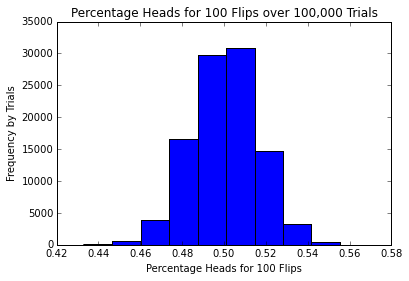

In [207]:
plt.hist(hundred_coin_flip_data)
plt.title("Percentage Heads for 100 Flips over 100,000 Trials")
plt.xlabel("Percentage Heads for 100 Flips")
plt.ylabel("Frequency by Trials")
plt.show()


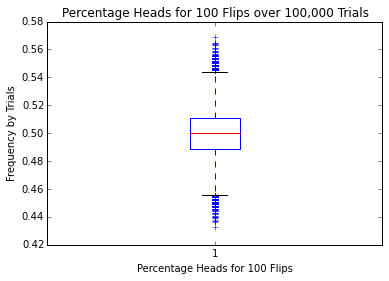

In [214]:
plt.boxplot(hundred_coin_flip_data)
plt.title("Percentage Heads for 100 Flips over 100,000 Trials")
plt.xlabel("Percentage Heads for 100 Flips")
plt.ylabel("Frequency by Trials")
plt.show()


In [208]:
def heads_tails_trial(x=1000):
    empty_list = []
    results_list = []
    for result in range(x):
        result = random.randint(0,1)
        empty_list.append(result)
    return empty_list
    
def multiple_trials(x=100000):
    trial_list = []
    for trials in range(x):
        trial_list.append(list(heads_or_tails()))
    return trial_list

def heads_tails_ratio2(data):
    for trial in multiple_trials:
        ratio_list = []
        for result in trial:
            result = list(result)
            for x in result:
                ratio = result[1] / result[0]
                ratio_list.append(ratio)
                break
        return ratio_list

def large_trial_ratios():
    trial_data = []
    for trial in multiple_trials():
        ratio = trial.count(1) / len(trial)
        trial_data.append(ratio)
    return trial_data

thousand_coin_flip_data = large_trial_ratios()





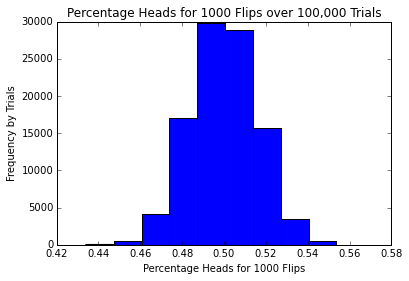

In [211]:
plt.hist(thousand_coin_flip_data)
plt.title("Percentage Heads for 1000 Flips over 100,000 Trials")
plt.xlabel("Percentage Heads for 1000 Flips")
plt.ylabel("Frequency by Trials")
plt.show()


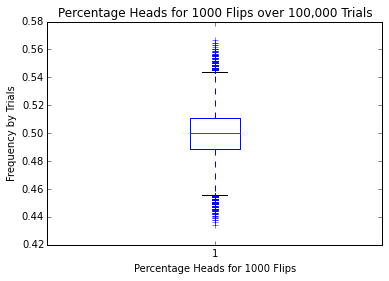

In [212]:
plt.boxplot(thousand_coin_flip_data)
plt.title("Percentage Heads for 1000 Flips over 100,000 Trials")
plt.xlabel("Percentage Heads for 1000 Flips")
plt.ylabel("Frequency by Trials")
plt.show()

TypeError: 'str' object is not callable